<a href="https://colab.research.google.com/github/Sathya252/Good_Cab-s_Performance/blob/main/Insights_to_Chief_of_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load all datasets**

In [58]:
fact_trips = pd.read_csv('/content/fact_trips.csv')
monthly_target_new_passengers = pd.read_csv('/content/monthly_target_new_passengers.csv')
monthly_target_trips = pd.read_csv('/content/monthly_target_trips.csv')
city_target_passenger_rating = pd.read_csv('/content/city_target_passenger_rating.csv')
dim_city = pd.read_csv('/content/dim_city.csv')
dim_date = pd.read_csv('/content/dim_date.csv')
dim_repeat_trip_distribution = pd.read_csv('/content/dim_repeat_trip_distribution.csv')
fact_passenger_summary = pd.read_csv('/content/fact_passenger_summary.csv')

**Display dataset shapes**

In [59]:
datasets = {
    "fact_trips": fact_trips,
    "monthly_target_new_passengers": monthly_target_new_passengers,
    "monthly_target_trips": monthly_target_trips,
    "city_target_passenger_rating": city_target_passenger_rating,
    "dim_city": dim_city,
    "dim_date": dim_date,
    "dim_repeat_trip_distribution": dim_repeat_trip_distribution,
    "fact_passenger_summary": fact_passenger_summary,
}

for name, df in datasets.items():
    print(f"{name}: {df.shape}")

fact_trips: (425903, 8)
monthly_target_new_passengers: (60, 3)
monthly_target_trips: (60, 3)
city_target_passenger_rating: (10, 2)
dim_city: (10, 2)
dim_date: (182, 4)
dim_repeat_trip_distribution: (540, 4)
fact_passenger_summary: (60, 5)


**Data Exploration**

In [60]:
fact_trips.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [61]:
for name, df in datasets.items():
    print(f"\n--- {name} ---")
    print(df.info())
    print(df.describe(include='all'))
    print(f"Missing values:\n{df.isnull().sum()}")


--- fact_trips ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trip_id                 425903 non-null  object
 1   date                    425903 non-null  object
 2   city_id                 425903 non-null  object
 3   passenger_type          425903 non-null  object
 4   distance_travelled(km)  425903 non-null  int64 
 5   fare_amount             425903 non-null  int64 
 6   passenger_rating        425903 non-null  int64 
 7   driver_rating           425903 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 26.0+ MB
None
                     trip_id        date city_id passenger_type  distance_travelled(km)    fare_amount  passenger_rating  driver_rating
count                 425903      425903  425903         425903           425903.000000  425903.000000      425903.00000  425903.000000
unique      

In [62]:
dim_city.city_name.unique()

array(['Jaipur', 'Lucknow', 'Surat', 'Kochi', 'Indore', 'Chandigarh',
       'Vadodara', 'Visakhapatnam', 'Coimbatore', 'Mysore'], dtype=object)

In [63]:
dim_city.city_id.unique()

array(['RJ01', 'UP01', 'GJ01', 'KL01', 'MP01', 'CH01', 'GJ02', 'AP01',
       'TN01', 'KA01'], dtype=object)

In [64]:
fact_trips.passenger_type.value_counts()

,count
passenger_type,
repeated,248905
new,176998


**Data Cleaning**

In [65]:
def clean_data(df):
    # Handle missing values
    if df.isnull().sum().sum() > 0:
        print(f"Missing values in {df.name}:\n{df.isnull().sum()}")
        df.fillna(method='ffill', inplace=True)

    # Remove duplicates
    if df.duplicated().sum() > 0:
        print(f"Duplicates in {df.name}: {df.duplicated().sum()}")
        df.drop_duplicates(inplace=True)

    return df

datasets = {
    "fact_trips": fact_trips,
    "monthly_target_new_passengers": monthly_target_new_passengers,
    "monthly_target_trips": monthly_target_trips,
    "city_target_passenger_rating": city_target_passenger_rating,
    "dim_city": dim_city,
    "dim_date": dim_date,
    "dim_repeat_trip_distribution": dim_repeat_trip_distribution,
    "fact_passenger_summary": fact_passenger_summary,
}

for name, df in datasets.items():
    df.name = name  # Add dataset name for identification
    datasets[name] = clean_data(df)

In [66]:
clean_data(fact_trips)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8
...,...,...,...,...,...,...,...,...
425898,TRPLUC2403180b02b4d0,2024-03-18,UP01,repeated,12,134,5,5
425899,TRPVAD2401032679e669,2024-01-03,GJ02,repeated,12,114,7,5
425900,TRPJAI24022578e10280,2024-02-25,RJ01,repeated,26,479,7,10
425901,TRPJAI240401e297ad20,2024-04-01,RJ01,repeated,27,361,7,10


**Data Transfromation**

In [67]:
fact_trips['date'] = pd.to_datetime(fact_trips['date'])

In [68]:
dim_date['start_of_month'] = pd.to_datetime(dim_date['start_of_month'])

In [69]:
dim_city.head()

,city_id,city_name
0,RJ01,Jaipur
1,UP01,Lucknow
2,GJ01,Surat
3,KL01,Kochi
4,MP01,Indore


In [70]:
fact_trips.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [71]:
fact_trips = fact_trips.merge(dim_city[["city_id", "city_name"]], on="city_id", how="left")
fact_trips.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,Vadodara
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,Coimbatore
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10,Kochi
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8,Visakhapatnam


In [72]:
fact_trips.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,Vadodara
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,Coimbatore
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10,Kochi
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8,Visakhapatnam


In [73]:
city_revenue = fact_trips.groupby('city_name')['fare_amount'].sum().reset_index()
city_revenue.rename(columns={'fare_amount': 'total_revenue'}, inplace=True)
city_revenue

,city_name,total_revenue
0,Chandigarh,11058401
1,Coimbatore,3523992
2,Indore,7635228
3,Jaipur,37207497
4,Kochi,16997596
5,Lucknow,9463551
6,Mysore,4054745
7,Surat,6431599
8,Vadodara,3797200
9,Visakhapatnam,8018282


# **Business Request 1: City-Level Fare and Trip Summary Report**

**Data Cleaning**

In [74]:
fact_trips = fact_trips.dropna(subset=['city_id', 'fare_amount', 'distance_travelled(km)'])
fact_trips = fact_trips[fact_trips['distance_travelled(km)'] > 0]

**Data Transformation**

In [75]:
city_summary = fact_trips.groupby('city_name').agg(
    total_trips=('trip_id', 'count'),
    avg_fare_per_km=('fare_amount', lambda x: (x.sum() / fact_trips['distance_travelled(km)'].sum())),
    avg_fare_per_trip=('fare_amount', 'mean')
).reset_index()
print(city_summary)

       city_name  total_trips  avg_fare_per_km  avg_fare_per_trip
0     Chandigarh        38981         1.357472         283.686950
1     Coimbatore        21104         0.432587         166.982183
2         Indore        42456         0.937261         179.838609
3         Jaipur        76888         4.567399         483.918128
4          Kochi        50702         2.086537         335.245079
5        Lucknow        64299         1.161696         147.180376
6         Mysore        16238         0.497739         249.707168
7          Surat        54843         0.789510         117.272925
8       Vadodara        32026         0.466125         118.566165
9  Visakhapatnam        28366         0.984283         282.672284


**Insight Generation**

In [76]:
total_trips = city_summary['total_trips'].sum()
city_summary['% contribution_to_total_trips'] = (city_summary['total_trips'] / total_trips) * 100
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(city_summary)

       city_name  total_trips  avg_fare_per_km  avg_fare_per_trip  % contribution_to_total_trips
0     Chandigarh        38981         1.357472         283.686950                       9.152554
1     Coimbatore        21104         0.432587         166.982183                       4.955119
2         Indore        42456         0.937261         179.838609                       9.968467
3         Jaipur        76888         4.567399         483.918128                      18.052937
4          Kochi        50702         2.086537         335.245079                      11.904589
5        Lucknow        64299         1.161696         147.180376                      15.097100
6         Mysore        16238         0.497739         249.707168                       3.812605
7          Surat        54843         0.789510         117.272925                      12.876876
8       Vadodara        32026         0.466125         118.566165                       7.519553
9  Visakhapatnam        28366 

<ipython-input-77-742f3b94e8f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_summary.sort_values(by='total_trips', ascending=False),


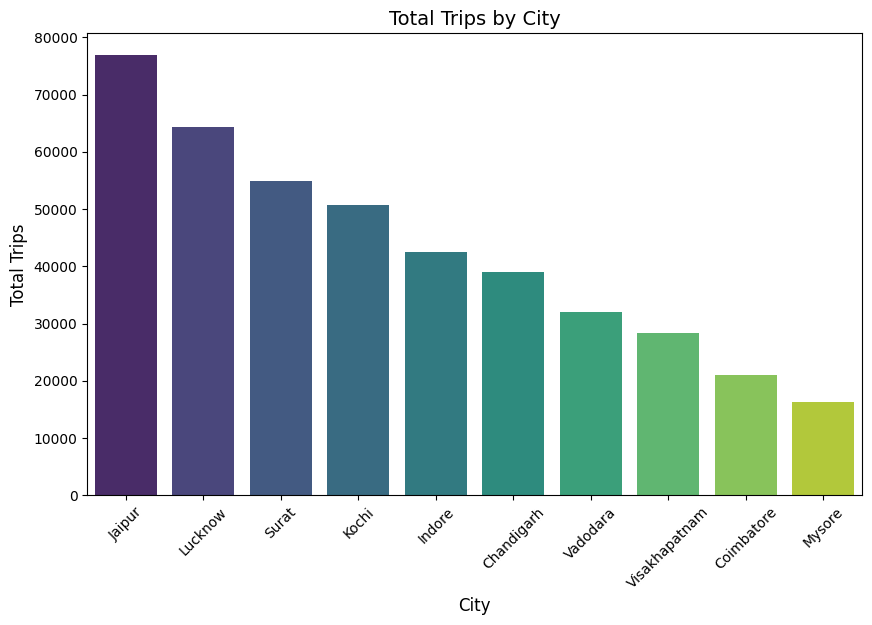

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=city_summary.sort_values(by='total_trips', ascending=False),
            x='city_name', y='total_trips', palette='viridis')

plt.title("Total Trips by City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Trips", fontsize=12)
plt.xticks(rotation=45)
plt.show()


# **Business Request 2: Monthly City-Level Trips Target Performance Report**

**Data Cleaning**

In [78]:
fact_trips['date'] = pd.to_datetime(fact_trips['date'])
fact_trips['month'] = fact_trips['date'].dt.to_period('M')
monthly_target_trips['month'] = pd.to_datetime(monthly_target_trips['month']).dt.to_period('M')

**Data Transformation**

In [79]:
monthly_trips = fact_trips.groupby(['city_id', 'month']).size().reset_index(name='actual_trips')
monthly_trips = monthly_trips.merge(monthly_target_trips, on=['city_id', 'month'], how='left')

monthly_trips['performance_status'] = monthly_trips.apply(
    lambda x: "Above Target" if x['actual_trips'] > x['total_target_trips'] else "Below Target", axis=1
)
monthly_trips['% difference'] = ((monthly_trips['actual_trips'] - monthly_trips['total_target_trips']) /
                                 monthly_trips['total_target_trips']) * 100

**Insights Generation**

In [80]:
monthly_trips.head()

,city_id,month,actual_trips,total_target_trips,performance_status,% difference
0,AP01,2024-01,4468,4500,Below Target,-0.711111
1,AP01,2024-02,4793,4500,Above Target,6.511111
2,AP01,2024-03,4877,4500,Above Target,8.377778
3,AP01,2024-04,4938,5000,Below Target,-1.240000
4,AP01,2024-05,4812,5000,Below Target,-3.760000


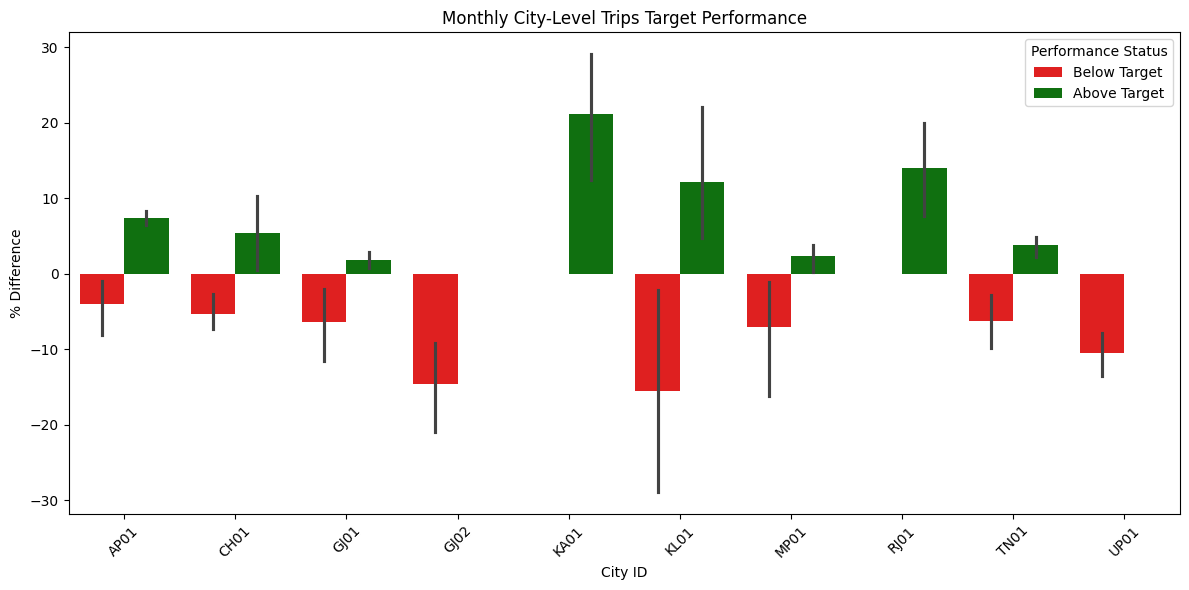

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_trips, x='city_id', y='% difference', hue='performance_status', palette={'Above Target': 'green', 'Below Target': 'red'})
plt.title('Monthly City-Level Trips Target Performance')
plt.xlabel('City ID')
plt.ylabel('% Difference')
plt.xticks(rotation=45)
plt.legend(title='Performance Status')
plt.tight_layout()
plt.show()

# **Business Request 3: City-Level Repeat Passenger Trip Frequency Report**

**Data Cleaning**

In [82]:
dim_repeat_trip_distribution['repeat_passenger_count'] = pd.to_numeric(dim_repeat_trip_distribution['repeat_passenger_count'], errors='coerce')
dim_repeat_trip_distribution.dropna(inplace=True)

**Data Transformation**

In [83]:
repeat_trips = dim_repeat_trip_distribution.pivot_table(
    index='city_id',
    columns='trip_count',
    values='repeat_passenger_count',
    aggfunc='sum',
    fill_value=0
)

**Insight Generation**

In [84]:
repeat_trips_percentage = repeat_trips.div(repeat_trips.sum(axis=1), axis=0) * 100
repeat_trips_percentage.reset_index(inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(repeat_trips_percentage)

trip_count city_id  10-Trips    2-Trips    3-Trips    4-Trips    5-Trips    6-Trips    7-Trips   8-Trips   9-Trips
0             AP01  0.920125  51.252937  24.960846   9.984338   5.442443   3.191073   1.977291  1.389977  0.880971
1             CH01  1.794872  32.307692  19.250493  15.739645  12.209073   7.416174   5.483235  3.471400  2.327416
2             GJ01  1.354480   9.759204  14.262561  16.554758  19.749942  18.453346  11.889326  6.239870  1.736513
3             GJ02  1.610676   9.871146  14.173953  16.520939  18.062586  19.075012  12.862402  5.775426  2.047860
4             KA01  0.473934  48.747461  24.441435  12.728504   5.822613   4.062288   1.760325  1.421801  0.541638
5             KL01  0.813008  47.665880  24.350905  11.814844   6.477839   3.907684   2.111199  1.652242  1.206399
6             MP01  1.510532  34.340355  22.685698  13.400776  10.338137   6.845898   5.238359  3.256652  2.383592
7             RJ01  0.970874  50.144598  20.729188  12.115265   6.290023   4.131

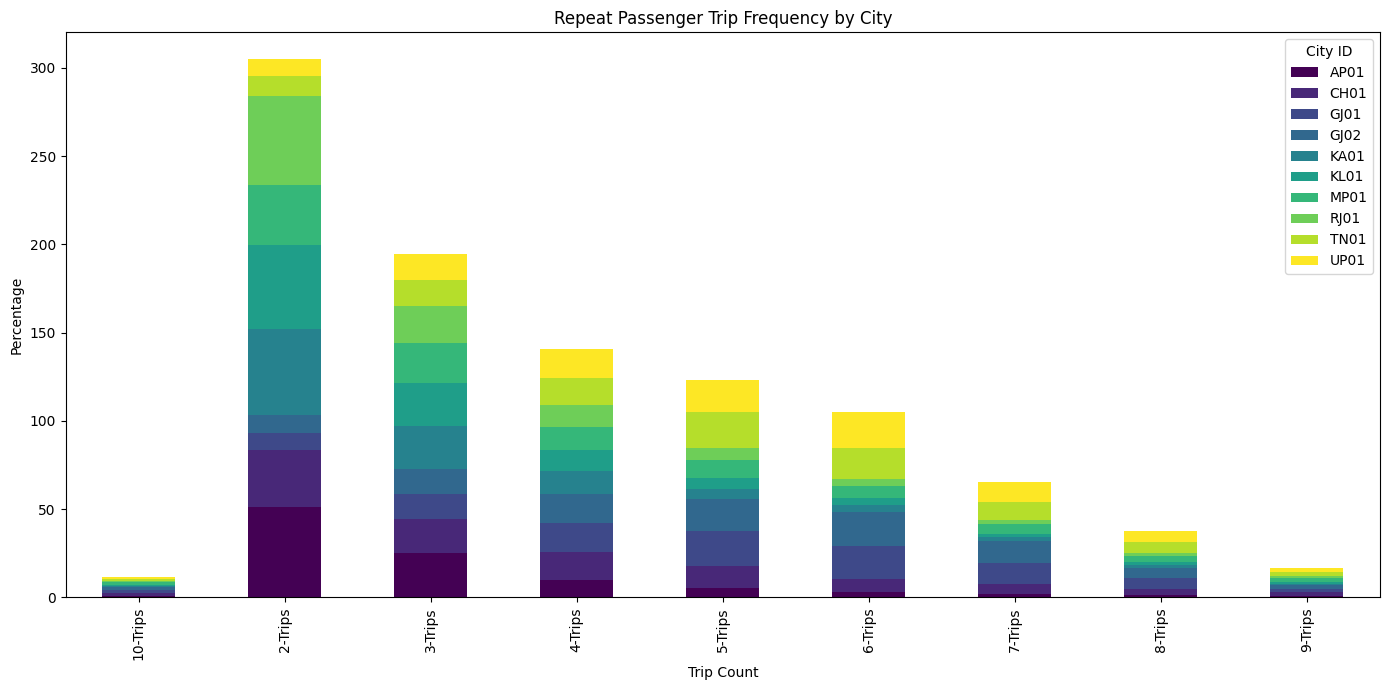

In [85]:
repeat_trips_percentage = repeat_trips_percentage.set_index('city_id')
repeat_trips_percentage.T.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Repeat Passenger Trip Frequency by City')
plt.xlabel('Trip Count')
plt.ylabel('Percentage')
plt.legend(title='City ID')
plt.tight_layout()
plt.show()

# **Business Request 4: Identify Cities with Highest and Lowest Total New Passengers**

**Data Cleaning**

In [86]:
fact_passenger_summary = fact_passenger_summary[fact_passenger_summary['new_passengers'] >= 0]
fact_passenger_summary.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129


**Data Transformation**

In [87]:
city_new_passengers = fact_passenger_summary.groupby('city_id')['new_passengers'].sum().reset_index()
city_new_passengers = city_new_passengers.merge(dim_city, on='city_id', how='left')

city_new_passengers['rank'] = city_new_passengers['new_passengers'].rank(ascending=False)
city_new_passengers['city_category'] = city_new_passengers['rank'].apply(
    lambda x: "Top 3" if x <= 3 else "Bottom 3" if x > len(city_new_passengers) - 3 else "Other"
)

**Insights Genration**

In [88]:
city_new_passengers.sort_values(by='new_passengers', ascending=False)

,city_id,new_passengers,city_name,rank,city_category
7,RJ01,45856,Jaipur,1.0,Top 3
5,KL01,26416,Kochi,2.0,Top 3
1,CH01,18908,Chandigarh,3.0,Top 3
9,UP01,16260,Lucknow,4.0,Other
6,MP01,14863,Indore,5.0,Other
0,AP01,12747,Visakhapatnam,6.0,Other
4,KA01,11681,Mysore,7.0,Other
2,GJ01,11626,Surat,8.0,Bottom 3
3,GJ02,10127,Vadodara,9.0,Bottom 3
8,TN01,8514,Coimbatore,10.0,Bottom 3


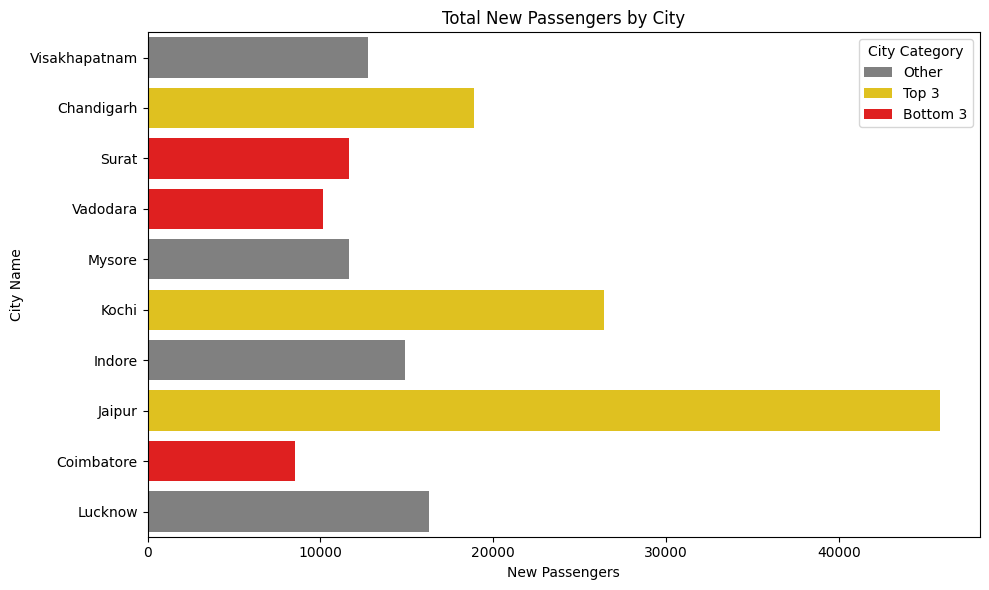

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(data=city_new_passengers, y='city_name', x='new_passengers', hue='city_category', palette={'Top 3': 'gold', 'Bottom 3': 'red', 'Other': 'gray'})
plt.title('Total New Passengers by City')
plt.xlabel('New Passengers')
plt.ylabel('City Name')
plt.legend(title='City Category')
plt.tight_layout()
plt.show()

# **Business Request 5: Identify Month with Highest Revenue for Each City**

**Data Cleaning**

In [90]:
fact_trips = fact_trips[fact_trips['fare_amount'] >= 0]

**Data Transformation**

In [91]:
fact_trips['month'] = fact_trips['date'].dt.to_period('M')
monthly_revenue = fact_trips.groupby(['city_id', 'month'])['fare_amount'].sum().reset_index()

highest_revenue = monthly_revenue.loc[monthly_revenue.groupby('city_id')['fare_amount'].idxmax()]
highest_revenue['% contribution'] = highest_revenue.groupby('city_id')['fare_amount'].transform(
    lambda x: (x / x.sum()) * 100
)

**Insight Generation**

In [92]:
highest_revenue.sort_values(by='month', ascending=True, inplace=True)

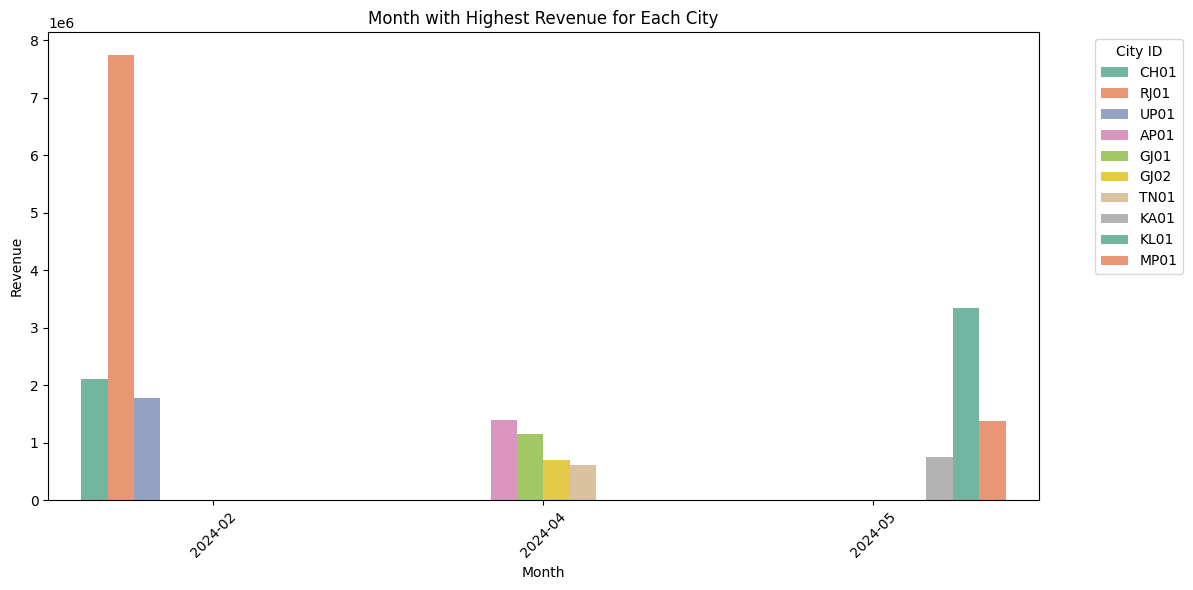

In [93]:
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_revenue, x='month', y='fare_amount', hue='city_id', palette='Set2')
plt.title('Month with Highest Revenue for Each City')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='City ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Business Request 6: Repeat Passenger Rate Analysis**

**Data Cleaning**

In [94]:
fact_passenger_summary = fact_passenger_summary[(fact_passenger_summary['repeat_passengers'] >= 0) &(fact_passenger_summary['total_passengers'] >= 0)]

In [95]:
fact_passenger_summary.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129


**Data Transformation**

In [96]:
fact_passenger_summary['monthly_repeat_passenger_rate'] = (
    fact_passenger_summary['repeat_passengers'] / fact_passenger_summary['total_passengers'] * 100
)
city_repeat_rate = fact_passenger_summary.groupby('city_id').agg(
    total_passengers=('total_passengers', 'sum'),
    repeat_passengers=('repeat_passengers', 'sum')
)
city_repeat_rate['city_repeat_passenger_rate'] = round(
    city_repeat_rate['repeat_passengers'] / city_repeat_rate['total_passengers'] * 100.2
)

In [97]:
city_repeat_rate = fact_passenger_summary.groupby(['city_id', 'month']).agg(
    total_passengers=('total_passengers', 'sum'),
    repeat_passengers=('repeat_passengers', 'sum')
).reset_index()

city_repeat_rate['city_repeat_passenger_rate'] = (
    city_repeat_rate['repeat_passengers'] / city_repeat_rate['total_passengers'] * 100
)

**Insights Generation**

In [98]:
fact_passenger_summary.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers,monthly_repeat_passenger_rate
0,2024-01-01,AP01,2513,650,3163,20.550111
1,2024-01-01,CH01,3920,720,4640,15.517241
2,2024-01-01,GJ01,2432,1184,3616,32.743363
3,2024-01-01,GJ02,2089,544,2633,20.660843
4,2024-01-01,KA01,1957,172,2129,8.078910


In [99]:
city_repeat_rate

,city_id,month,total_passengers,repeat_passengers,city_repeat_passenger_rate
0,AP01,2024-01-01,3163,650,20.550111
1,AP01,2024-02-01,3170,790,24.921136
2,AP01,2024-03-01,3093,923,29.841578
3,AP01,2024-04-01,2837,992,34.966514
4,AP01,2024-05-01,2890,951,32.906574
5,AP01,2024-06-01,2702,802,29.681717
6,CH01,2024-01-01,4640,720,15.517241
7,CH01,2024-02-01,4957,853,17.207989
8,CH01,2024-03-01,4100,872,21.268293
9,CH01,2024-04-01,3285,789,24.018265


In [100]:
city_repeat_rate.sort_values(by='city_repeat_passenger_rate', ascending=False)

,city_id,month,total_passengers,repeat_passengers,city_repeat_passenger_rate
16,GJ01,2024-05-01,3217,1606,49.922288
17,GJ01,2024-06-01,3030,1490,49.174917
58,UP01,2024-05-01,3487,1662,47.662747
59,UP01,2024-06-01,3698,1727,46.700919
15,GJ01,2024-04-01,3394,1551,45.698291
40,MP01,2024-05-01,3591,1563,43.525480
14,GJ01,2024-03-01,3440,1494,43.430233
57,UP01,2024-04-01,3807,1496,39.296034
23,GJ02,2024-06-01,1807,703,38.904261
22,GJ02,2024-05-01,2256,868,38.475177


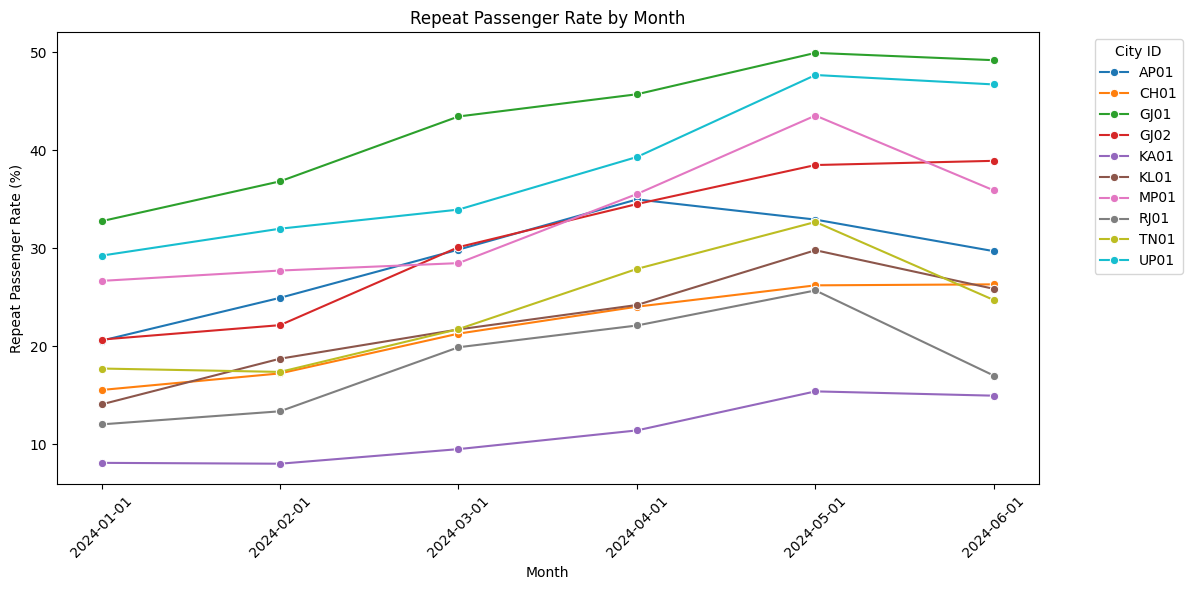

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_repeat_rate, x='month', y='city_repeat_passenger_rate', hue='city_id', marker='o', palette='tab10')
plt.title('Repeat Passenger Rate by Month')
plt.xlabel('Month')
plt.ylabel('Repeat Passenger Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='City ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()